# header

In [1]:
'''
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}

setInterval(ConnectButton,60000);
'''

from google.colab import drive
from os import chdir

drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/Gproject/MIT_glyco'
chdir(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import os
from os.path import exists
print(os.getcwd()) # current working directory

update = False

/content/drive/MyDrive/Gproject/MIT_glyco


In [3]:
load_name = "./data/data_for_ml.csv"
protein_list = list(pd.read_csv(load_name).protein.unique())
protein_augmented = [name for name in protein_list if exists(f'./data/data_for_ml(augmented)/{name}.csv')]

dataset = []
for name in protein_augmented:
    load_path = f'./data/data_for_ml(augmented)/{name}.csv'
    dataset.append(pd.read_csv(load_path))
dataset = pd.concat(dataset, axis=0).reset_index(drop=True)

positive = dataset[dataset['positivity']==1]

print("total number of proteins:          ", len(protein_list))
print("total number of augmented proteins:", len(protein_augmented))
print("total number of positive sites:    ", len(positive))

total number of proteins:           272
total number of augmented proteins: 89
total number of positive sites:     185


## parameter settings

In [4]:
from src.Data import *
from src.Preprocessing import *
from src.models import *

variables = xy_variables()
test_size = 0.2
valid_size = test_size/(1-test_size)

import random
random_state = 1
n_cv = 20

hpo_counts = 30
hpo_config = {
    "n_layers" : range(1,11),
    "n_neurons" : [16, 32, 64, 128, 256]
}
metrics = ['rnn_layers', 'rnn_neurons', 'dnn_layers', 'dnn_neurons', 
           'epoch', 'time', 'loss', 'val_loss', 'test_loss', 'accuracy', 'precision', 'recall', 'f1']
method = "random"

# model

In [5]:
model_name = 'augmented_rnn_important_features_cts'
x_important = pd.read_csv('./data/features-important-names.csv').column_name.to_list()
x_important

['net_charge_all_around_target_ser_thr',
 'number_of_arg',
 'number_of_g',
 'number_of_ser',
 'number_of_thr',
 'number_of_v',
 'HSE_alpha_down',
 'nAli',
 'nS/nT',
 'Tau(i-2=>i+2)',
 'all_atom_positive_charge_all_around_target_ser_thr',
 'all_atom_positive_charge_all_backbone_around_target_ser_thr',
 'all_atom_positive_charge_all_backbone_with_around_target_ser_thr',
 'all_atom_positive_charge_all_sidechain_around_target_ser_thr',
 'all_atom_positive_charge_all_with_around_target_ser_thr',
 'all_sasa_cys',
 'all_sasa_leu',
 'all_sasa_lys',
 'all_sasa_met',
 'all_sasa_phe',
 'exposed_charge_all_sidechain_with_around_target_ser_thr',
 'exposed_charge_all_with_around_target_ser_thr',
 'net_charge_all_backbone_around_target_ser_thr',
 'net_charge_all_backbone_with_around_target_ser_thr',
 'net_charge_all_sidechain_around_target_ser_thr',
 'net_charge_all_sidechain_with_around_target_ser_thr',
 'net_charge_all_with_around_target_ser_thr',
 'number_of_aromatic',
 'number_of_e',
 'number_of_

In [6]:
x_cts   = [
    'ASA', 'Phi', 'Psi', 'Theta(i-1=>i+1)', 'Tau(i-2=>i+2)', 'HSE_alpha_up', 'HSE_alpha_down', 'P(C)', 'P(H)', 'P(E)', 'flexibility',
    'all_atom_positive_charge_all_around_target_ser_thr',
    'all_atom_positive_charge_all_backbone_around_target_ser_thr',
    'all_atom_positive_charge_all_backbone_with_around_target_ser_thr',
    'all_atom_positive_charge_all_sidechain_around_target_ser_thr',
    'all_atom_positive_charge_all_with_around_target_ser_thr',
    'all_sasa_cys',
    'all_sasa_leu',
    'all_sasa_lys',
    'all_sasa_met',
    'all_sasa_phe',
    'exposed_charge_all_sidechain_with_around_target_ser_thr',
    'exposed_charge_all_with_around_target_ser_thr',
    'exposed_positive_charge_all_with_around_target_ser_thr',
    'net_charge_all_backbone_around_target_ser_thr',
    'net_charge_all_backbone_with_around_target_ser_thr',
    'net_charge_all_sidechain_around_target_ser_thr',
    'net_charge_all_sidechain_with_around_target_ser_thr',
    'net_charge_all_with_around_target_ser_thr',
    'net_charge_all_around_target_ser_thr',
    'sasa_ala',
    'sasa_back',
    'sasa_cys',
    'sasa_e',
    'sasa_g',
    'sasa_ile',
    'sasa_lys',
    'sasa_negative',
    'sasa_polar',
    'sasa_s',
    'sasa_ser',
    'sasa_all_with_around_target_ser_thr',
    'number_of_arg',
    'number_of_g',
    'number_of_ser',
    'number_of_thr',
    'number_of_v',
    'number_of_aromatic',
    'number_of_e',
    'number_of_f',
    'number_of_hydrophilic',
    'number_of_hydrophobic',
    'number_of_l',
    'number_of_leu',
    'number_of_lys',
    'number_of_n',
    'number_of_p',
    'number_of_polar',
    'number_of_s',
    'residue_SER_THR'
]
x_cat   = ['SEQ', 'SS']
y_label = variables.y_label

print(f"{len(x_cts)} x_cts")
print(f"{len(x_cat)} x_cat: {x_cat}")
print(f"{len(y_label)} y_label: {y_label}")

data_x, data_y = df_to_dummy(dataset, x_cts, x_cat, y_label)
display(dict(zip(range(len(data_x.columns)), data_x.columns)))

60 x_cts
2 x_cat: ['SEQ', 'SS']
1 y_label: ['positivity']
dummy x shape: (59027, 83)
dummy y shape: (59027, 1)


{0: 'ASA',
 1: 'Phi',
 2: 'Psi',
 3: 'Theta(i-1=>i+1)',
 4: 'Tau(i-2=>i+2)',
 5: 'HSE_alpha_up',
 6: 'HSE_alpha_down',
 7: 'P(C)',
 8: 'P(H)',
 9: 'P(E)',
 10: 'flexibility',
 11: 'all_atom_positive_charge_all_around_target_ser_thr',
 12: 'all_atom_positive_charge_all_backbone_around_target_ser_thr',
 13: 'all_atom_positive_charge_all_backbone_with_around_target_ser_thr',
 14: 'all_atom_positive_charge_all_sidechain_around_target_ser_thr',
 15: 'all_atom_positive_charge_all_with_around_target_ser_thr',
 16: 'all_sasa_cys',
 17: 'all_sasa_leu',
 18: 'all_sasa_lys',
 19: 'all_sasa_met',
 20: 'all_sasa_phe',
 21: 'exposed_charge_all_sidechain_with_around_target_ser_thr',
 22: 'exposed_charge_all_with_around_target_ser_thr',
 23: 'exposed_positive_charge_all_with_around_target_ser_thr',
 24: 'net_charge_all_backbone_around_target_ser_thr',
 25: 'net_charge_all_backbone_with_around_target_ser_thr',
 26: 'net_charge_all_sidechain_around_target_ser_thr',
 27: 'net_charge_all_sidechain_with_ar

In [7]:
window_size = 10

rnn_input  = []
rnn_output = []

for name in protein_augmented:
    load_path = f'./data/data_for_ml(augmented)/{name}.csv'
    temp = pd.read_csv(load_path)
    temp_x, temp_y = custom_dummy(temp, x_cts, x_cat, y_label)
    
    temp_input, temp_output = data_to_sequence(temp_x, temp_y, window_size)
    rnn_input.append(temp_input)
    rnn_output.append(temp_output)
    
rnn_input  = np.concatenate(rnn_input, axis=0)
rnn_output = np.concatenate(rnn_output, axis=0)

print(f'rnn input shape : {rnn_input.shape}')
print(f'rnn output shape: {rnn_output.shape}')

rnn input shape : (8910, 21, 83)
rnn output shape: (8910, 1)


## cross validation

In [8]:
# select n_layers and n_neurons as the best values of HPO
rnn_layers = 2
rnn_neurons = 100
dnn_layers = 5
dnn_neurons = 100
cv_path = f'./result/cv_result_{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_{n_cv}.csv'

cv_result = pd.DataFrame([], columns=metrics)
if not exists(cv_path) or update:
    for i in range(n_cv):
        print(f"\n{i+1}th iteration")
        random.seed(i+1)
        train_x, train_y, test_x, test_y, _, _ = stratified_split(rnn_input, rnn_output, 
                                                              test_size=test_size, random_state=i+1, 
                                                              scale_x=x_cts, scale_y=[])
        train_x, train_y = up_sampling(train_x, train_y) 

        history_size = train_x.shape[1]
        x_dim = train_x.shape[2]
        y_dim = train_y.shape[1]
        save_path  = f'./h5/{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_cv_{i+1}of{n_cv}.h5'

        model = RNN(history_size, x_dim, y_dim)
        model.build(rnn_layers, rnn_neurons, dnn_layers, dnn_neurons)
        if not exists(save_path) or update:
            model.train(train_x, train_y, valid_data=[test_x, test_y], save_path=save_path, verbose=2)
        else:
            model.load_model(save_path)

        epoch = model.epoch
        time = model.time
        loss = model.loss
        val_loss = model.val_loss
        test_loss, accuracy, precision, recall, f1 = model.evaluate(test_x, test_y)
        cv = pd.DataFrame([[rnn_layers, rnn_neurons, dnn_layers, dnn_neurons, epoch, time, loss, val_loss, test_loss, accuracy, 
                             precision[1], recall[1], f1[1]]], columns=metrics)
        cv_result = pd.concat([cv_result, cv], axis=0)
    cv_result = cv_result.reset_index(drop=True)
    cv_result.to_csv(cv_path, index=False)    
    
else:
    cv_result = pd.read_csv(cv_path)

display(cv_result)


1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.041610541103338
up-sampled train dataset: (13960, 21, 83) (13960, 1)
Epoch 1/10000
437/437 - 9s - loss: 0.4996 - accuracy: 0.7523 - val_loss: 0.3560 - val_accuracy: 0.8272 - 9s/epoch - 20ms/step
Epoch 2/10000
437/437 - 3s - loss: 0.2420 - accuracy: 0.9067 - val_loss: 0.3145 - val_accuracy: 0.8653 - 3s/epoch - 7ms/step
Epoch 3/10000
437/437 - 3s - loss: 0.1430 - accuracy: 0.9504 - val_loss: 0.2839 - val_accuracy: 0.9024 - 3s/epoch - 7ms/step
Epoch 4/10000
437/437 - 4s - loss: 0.0874 - accuracy: 0.9751 - val_loss: 0.2478 - val_accuracy: 0.9747 - 4s/epoch - 8ms/step
Epoch 5/10000
437/437 - 5s - loss: 0.0707 - accuracy: 0.9780 - val_loss: 0.2241 - val_accuracy: 0.9646 - 5s/epoch - 10ms/step
Epoch 6/10000
437/437 - 3s - loss: 0.0475 - accuracy: 0.9865 - val_loss: 0.1803 - val_accuracy: 0.9568 - 3s/epoch - 7ms/step
Epoch 7/10000
4

,rnn_layers,rnn_neurons,dnn_layers,dnn_neurons,epoch,time,loss,val_loss,test_loss,accuracy,precision,recall,f1
0,2,100,5,100,41,4.021,0.016912,0.145224,0.145224,96.07,18.87,27.03,22.22
1,2,100,5,100,27,3.264,0.002877,0.190269,0.190269,97.53,38.71,32.43,35.29
2,2,100,5,100,53,4.667,0.016500,0.165131,0.165131,97.25,30.00,24.32,26.87
3,2,100,5,100,7,2.085,0.032545,0.166773,0.166773,97.47,39.47,40.54,40.00
4,2,100,5,100,3,1.911,0.096119,0.162347,0.162347,97.03,34.62,48.65,40.45
5,2,100,5,100,46,4.259,0.007888,0.238940,0.238940,97.08,20.00,13.51,16.13
6,2,100,5,100,11,2.368,0.023439,0.201974,0.201974,96.07,21.05,32.43,25.53
7,2,100,5,100,37,3.773,0.020432,0.189285,0.189285,96.75,24.39,27.03,25.64
8,2,100,5,100,9,2.263,0.028063,0.192324,0.192324,95.62,21.92,43.24,29.09
9,2,100,5,100,21,2.899,0.011351,0.254041,0.254041,94.16,9.64,21.62,13.33



1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.041610541103338
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_1of20.h5


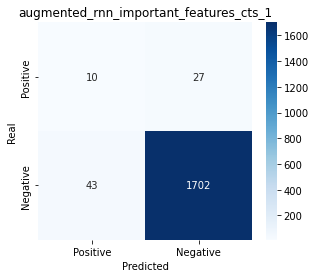

accuracy  : 96.07
precision : [98.44 18.87]
recall    : [97.54 27.03]
f1_score  : [97.99 22.22]

2th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.04339519453794438 1.0086382113821137
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_2of20.h5


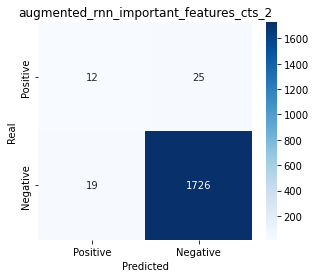

accuracy  : 97.53
precision : [98.57 38.71]
recall    : [98.91 32.43]
f1_score  : [98.74 35.29]

3th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.2336416554272873
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_3of20.h5


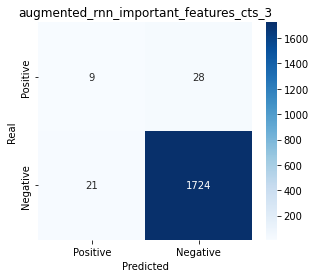

accuracy  : 97.25
precision : [98.4 30. ]
recall    : [98.8  24.32]
f1_score  : [98.6  26.87]

4th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.015855039920292593 1.2336416554272873
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_4of20.h5


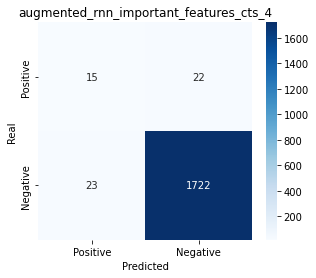

accuracy  : 97.47
precision : [98.74 39.47]
recall    : [98.68 40.54]
f1_score  : [98.71 40.  ]

5th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.1
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_5of20.h5


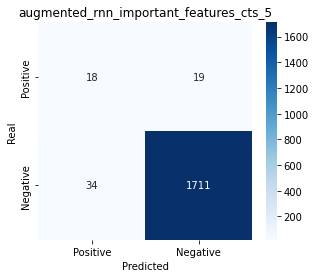

accuracy  : 97.03
precision : [98.9  34.62]
recall    : [98.05 48.65]
f1_score  : [98.47 40.45]

6th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.041610541103338
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_6of20.h5


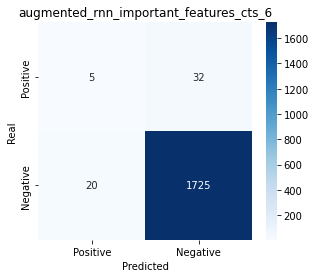

accuracy  : 97.08
precision : [98.18 20.  ]
recall    : [98.85 13.51]
f1_score  : [98.52 16.13]

7th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.2336416554272873
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_7of20.h5


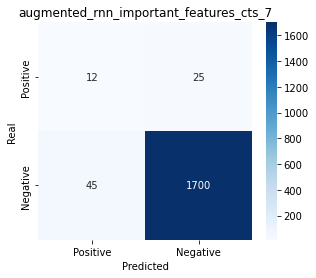

accuracy  : 96.07
precision : [98.55 21.05]
recall    : [97.42 32.43]
f1_score  : [97.98 25.53]

8th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.04339519453794438 1.2336416554272873
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_8of20.h5


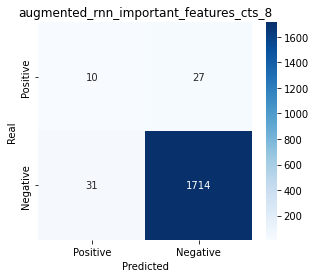

accuracy  : 96.75
precision : [98.45 24.39]
recall    : [98.22 27.03]
f1_score  : [98.34 25.64]

9th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.04339519453794438 1.1
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_9of20.h5


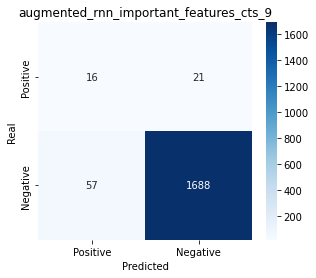

accuracy  : 95.62
precision : [98.77 21.92]
recall    : [96.73 43.24]
f1_score  : [97.74 29.09]

10th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.0416666666666667
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_10of20.h5


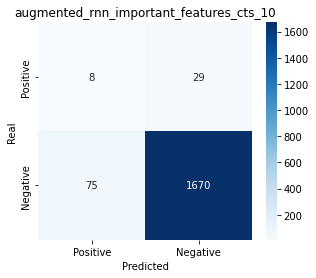

accuracy  : 94.16
precision : [98.29  9.64]
recall    : [95.7  21.62]
f1_score  : [96.98 13.33]

11th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_11of20.h5


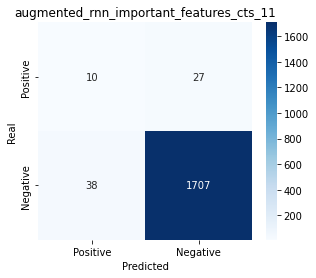

accuracy  : 96.35000000000001
precision : [98.44 20.83]
recall    : [97.82 27.03]
f1_score  : [98.13 23.53]

12th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.04339519453794438 1.0416666666666667
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_12of20.h5


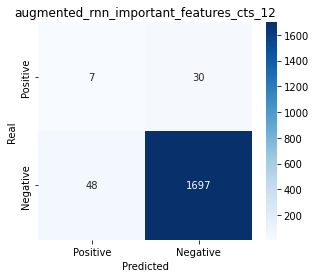

accuracy  : 95.62
precision : [98.26 12.73]
recall    : [97.25 18.92]
f1_score  : [97.75 15.22]

13th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.1
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_13of20.h5


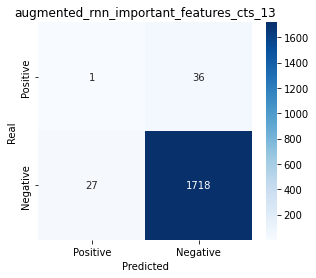

accuracy  : 96.46000000000001
precision : [97.95  3.57]
recall    : [98.45  2.7 ]
f1_score  : [98.2   3.08]

14th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.0411931084244483
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_14of20.h5


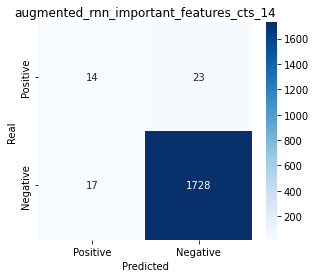

accuracy  : 97.76
precision : [98.69 45.16]
recall    : [99.03 37.84]
f1_score  : [98.86 41.18]

15th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.04339519453794438 1.1
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_15of20.h5


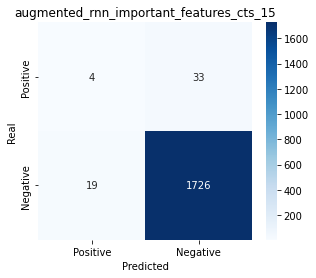

accuracy  : 97.08
precision : [98.12 17.39]
recall    : [98.91 10.81]
f1_score  : [98.52 13.33]

16th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.04339519453794438 1.2336416554272873
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_16of20.h5


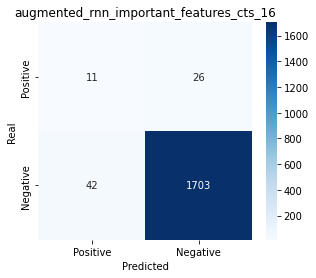

accuracy  : 96.17999999999999
precision : [98.5  20.75]
recall    : [97.59 29.73]
f1_score  : [98.04 24.44]

17th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.0800457603363625
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_17of20.h5


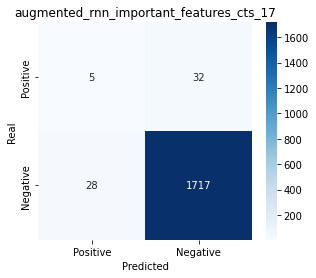

accuracy  : 96.63000000000001
precision : [98.17 15.15]
recall    : [98.4  13.51]
f1_score  : [98.28 14.29]

18th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.2492054421037964
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_18of20.h5


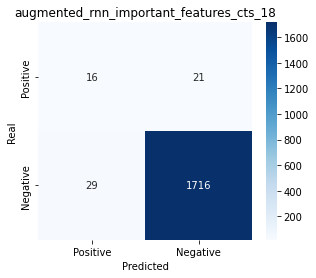

accuracy  : 97.19
precision : [98.79 35.56]
recall    : [98.34 43.24]
f1_score  : [98.56 39.02]

19th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_19of20.h5


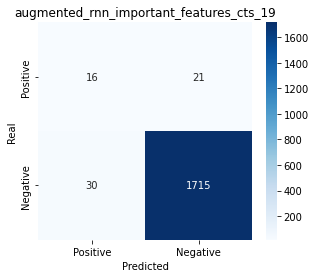

accuracy  : 97.14
precision : [98.79 34.78]
recall    : [98.28 43.24]
f1_score  : [98.53 38.55]

20th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 83) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 83) (1782, 1)
check scale: -0.04339519453794438 1.2336416554272873
up-sampled train dataset: (13960, 21, 83) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_cts_2_100_5_100_cv_20of20.h5


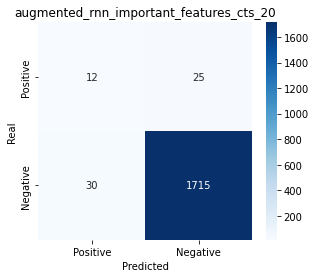

accuracy  : 96.91
precision : [98.56 28.57]
recall    : [98.28 32.43]
f1_score  : [98.42 30.38]


In [9]:
from src.graph_plot import *

for i in range(n_cv):
    print(f"\n{i+1}th iteration")
    random.seed(i+1)
    train_x, train_y, test_x, test_y, _, _ = stratified_split(rnn_input, rnn_output, 
                                                          test_size=test_size, random_state=i+1, 
                                                          scale_x=x_cts, scale_y=[])
    train_x, train_y = up_sampling(train_x, train_y)

    history_size = train_x.shape[1]
    x_dim = train_x.shape[2]
    y_dim = train_y.shape[1]
    save_path  = f'./h5/{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_cv_{i+1}of{n_cv}.h5'

    model = RNN(history_size, x_dim, y_dim)
    model.build(rnn_layers, rnn_neurons, dnn_layers, dnn_neurons)
    model.load_model(save_path)
    
    prediction = model.model.predict(test_x, verbose=0)
    y_pred = prediction.round(0).astype(int)
    y_real = test_y
    
    plot_confusion(y_real, y_pred, title=model_name+f"_{i+1}", label=["Positive","Negative"])